In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from saxpy.znorm import znorm
from saxpy.sax import sax_via_window
from pyts.approximation import SymbolicAggregateApproximation

In [3]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
column_name = 'pleth_1'

In [4]:
data = pd.read_csv(filename)
time_series = data[column_name].values

In [5]:
time_series = time_series[:2000]

In [6]:
scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

In [7]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vectorizer.fit_transform([str(row) for row in time_series_scaled])

In [8]:
kmeans = KMeans(n_clusters=2, n_init=10) 
cluster_labels = kmeans.fit_predict(bow)

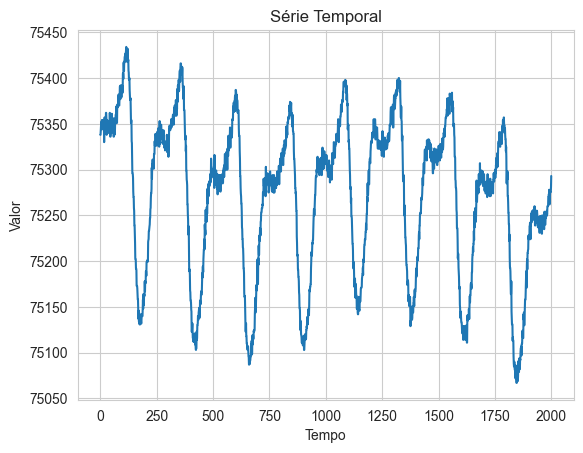

In [9]:
plt.plot(time_series)
plt.title('Série Temporal')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

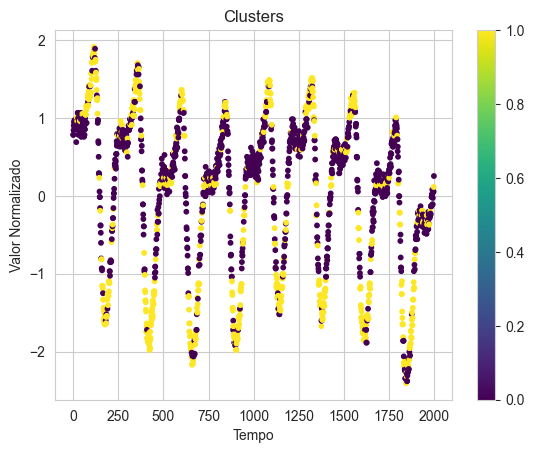

In [10]:
plt.scatter(range(len(time_series)), time_series_scaled, c=cluster_labels, cmap='viridis', s=10)
plt.title('Clusters')
plt.xlabel('Tempo')
plt.ylabel('Valor Normalizado')
plt.colorbar()
plt.grid(True)

In [11]:
n_symbols = 25
sax = SymbolicAggregateApproximation(n_bins=n_symbols, strategy='uniform')
sax_symbols = sax.fit_transform(time_series_scaled.reshape(1, -1))

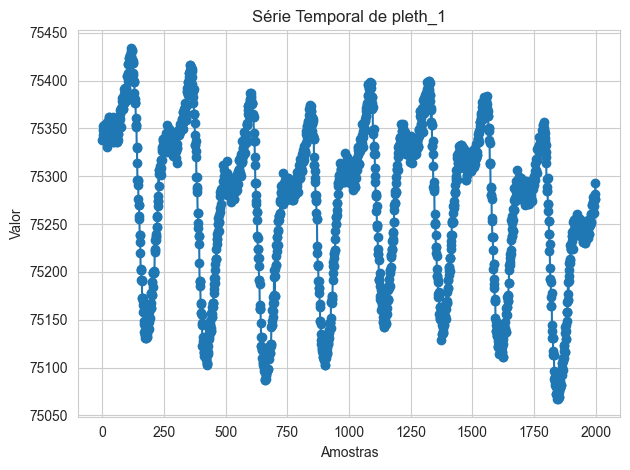

In [12]:
plt.plot(time_series, marker='o', linestyle='-')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.title(f'Série Temporal de {column_name}')
plt.tight_layout()
plt.show()

In [13]:
sax_vector = sax_symbols.flatten()
sax_vector

array(['s', 's', 's', ..., 'o', 'o', 'p'], dtype='<U1')

In [14]:
unique_symbols = sorted(set(sax_vector))
position_mapping = {symbol: idx for idx, symbol in enumerate(unique_symbols)}

In [15]:
y_positions = [position_mapping[symbol] for symbol in sax_vector]

/var/folders/_d/s8rf0l8s4l593n5f34ndtgtw0000gn/T/ipykernel_17702/4173725529.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(len(sax_vector)), y_positions, marker='o', c='b', cmap='viridis')


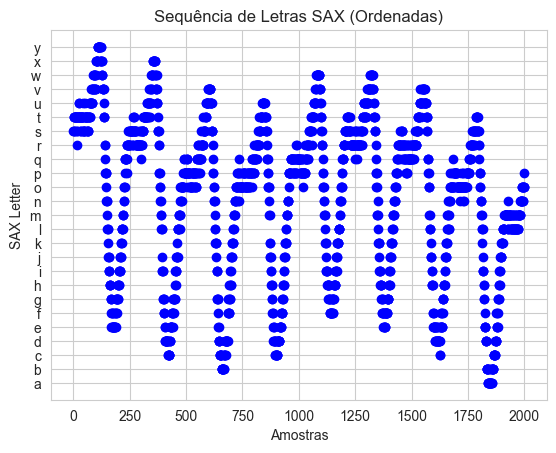

In [16]:
plt.scatter(range(len(sax_vector)), y_positions, marker='o', c='b', cmap='viridis')
plt.yticks(range(len(unique_symbols)), unique_symbols)
plt.xlabel('Amostras')
plt.ylabel('SAX Letter')
plt.title(f'Sequência de Letras SAX (Ordenadas)')
plt.show()

In [17]:
letter_counts = Counter(sax_vector)

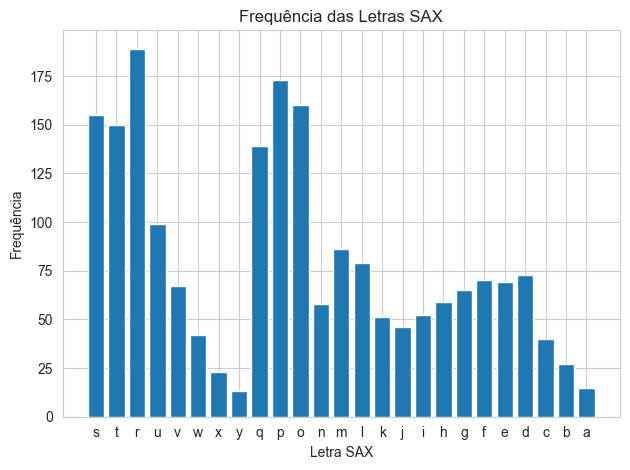

In [18]:
plt.bar(letter_counts.keys(), letter_counts.values())
plt.xlabel('Letra SAX')
plt.ylabel('Frequência')
plt.title('Frequência das Letras SAX')
plt.tight_layout()
plt.show()

/var/folders/_d/s8rf0l8s4l593n5f34ndtgtw0000gn/T/ipykernel_17702/2689395155.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(range(len(sax_vector)), y_positions, marker='o', c='b', cmap='viridis')


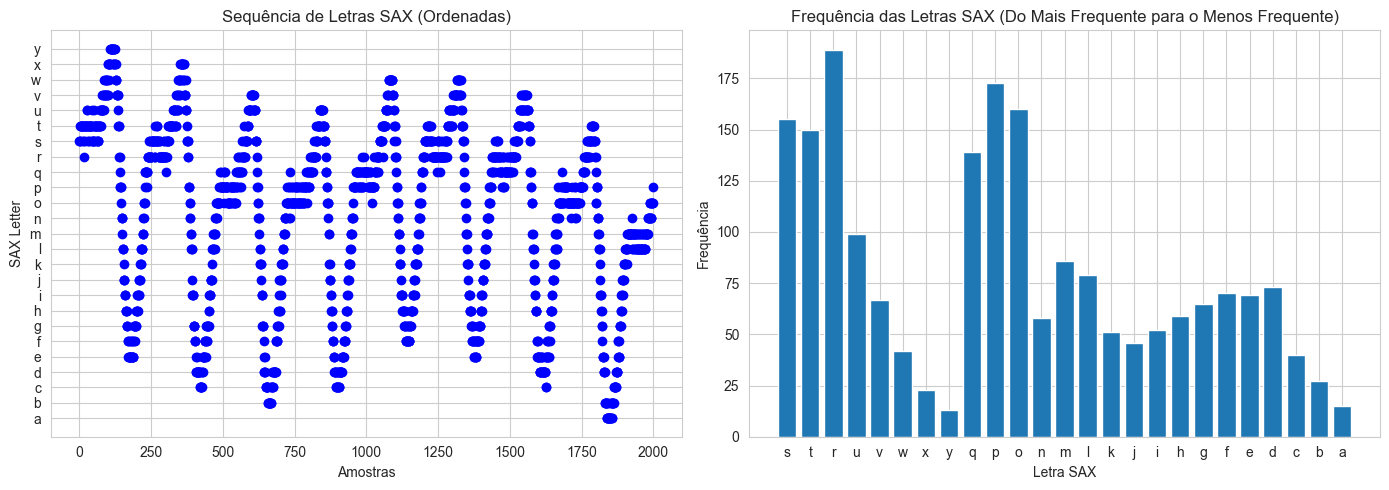

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(range(len(sax_vector)), y_positions, marker='o', c='b', cmap='viridis')
axs[0].set_yticks(range(len(unique_symbols)))
axs[0].set_yticklabels(unique_symbols)
axs[0].set_xlabel('Amostras')
axs[0].set_ylabel('SAX Letter')
axs[0].set_title(f'Sequência de Letras SAX (Ordenadas)')

axs[1].bar(letter_counts.keys(), letter_counts.values())
axs[1].set_xlabel('Letra SAX')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Frequência das Letras SAX (Do Mais Frequente para o Menos Frequente)')
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()